In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from ortools.linear_solver import pywraplp
from datetime import datetime, timedelta
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from matplotlib import rcParams
import glob

# Visualise the Hydrogen Daily Demand Forecast in 12-month

Text(0, 0.5, 'Hydrogen Daily Demand (KG)')

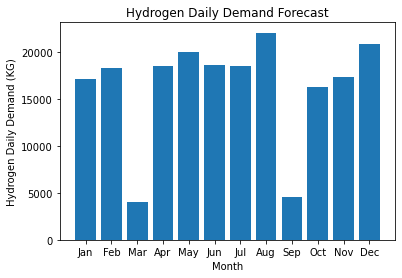

In [2]:
# Create lists of month names and hydrogen daily demand forecasts
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hydrogen_demand_forecast = [17111, 18303, 3975, 18517, 20005, 18632, 18485, 22048, 4505, 16314, 17344, 20840]
# Bar-plot
plt.bar(months, hydrogen_demand_forecast)
plt.title('Hydrogen Daily Demand Forecast')
plt.xlabel('Month')
plt.ylabel('Hydrogen Daily Demand (KG)')

Text(0, 0.5, 'Hydrogen Daily Demand (KG)')

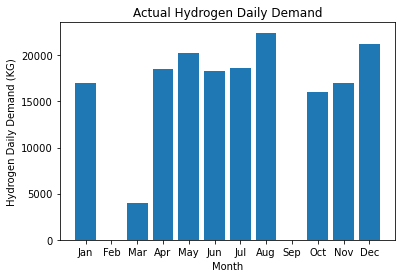

In [3]:
# Create lists of month names and hydrogen daily demand forecasts
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hydrogen_demand_actual = [16951, 0, 3949, 18504, 20254, 18277, 18666, 22437, 0, 16032, 17002, 21166]
# Bar-plot
plt.bar(months, hydrogen_demand_actual)
plt.title('Actual Hydrogen Daily Demand')
plt.xlabel('Month')
plt.ylabel('Hydrogen Daily Demand (KG)')

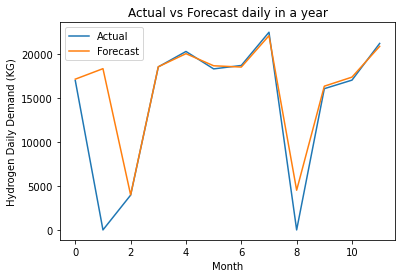

In [4]:
hydrogen_demand_forecast = [17111, 18303, 3975, 18517, 20005, 18632, 18485, 22048, 4505, 16314, 17344, 20840]
hydrogen_demand_actual = [16951, 0, 3949, 18504, 20254, 18277, 18666, 22437, 0, 16032, 17002, 21166]
plt.plot(hydrogen_demand_actual,label='Actual')
plt.plot(hydrogen_demand_forecast, label = 'Forecast')
plt.title('Actual vs Forecast daily in a year')
plt.xlabel('Month')
plt.ylabel('Hydrogen Daily Demand (KG)')
plt.legend()
plt.show()

# Visualise the predicted and acutal hydrogen demand in a year

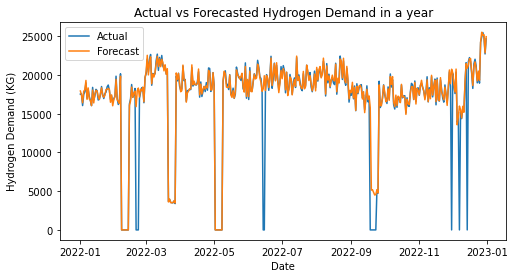

<Figure size 432x288 with 0 Axes>

In [5]:
# load data from csv file
data = pd.read_csv('daily.csv')
df = pd.DataFrame(data)
# convert date column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# create line chart

plt.figure(figsize=(8, 4))
plt.plot(df['Date'], df['Hydrogen_Demand_Actual_KG'], label='Actual')
plt.plot(df['Date'], df['Hydrogen_Demand_Forecast_KG'], label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Hydrogen Demand (KG)')
plt.title('Actual vs Forecasted Hydrogen Demand in a year')
plt.show()
rcParams['savefig.dpi'] = 300 
plt.savefig('yearily.png')

It seems that the prediction is quite accurate in most months but it is unclear to see it from the plot, hence we use scatter plot to compare.

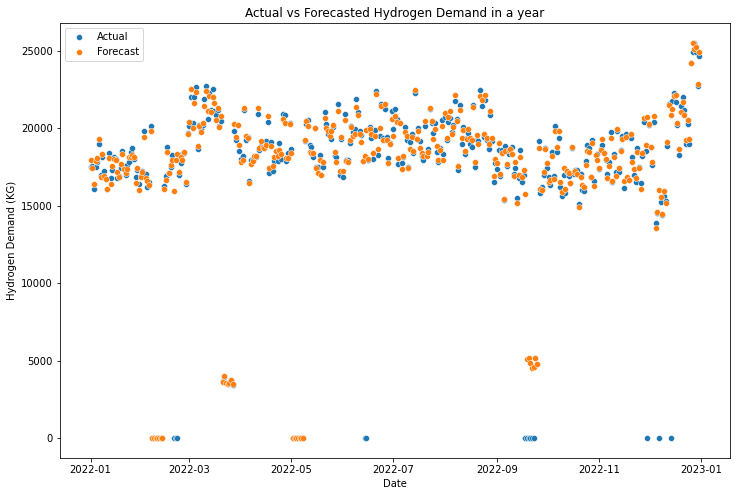

In [6]:
# load data from csv file
data = pd.read_csv('daily.csv')
df = pd.DataFrame(data)
# convert date column to datetime type
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Date'], y=df['Hydrogen_Demand_Actual_KG'], label='Actual')
sns.scatterplot(x=df['Date'], y=df['Hydrogen_Demand_Forecast_KG'], label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Hydrogen Demand (KG)')
plt.title('Actual vs Forecasted Hydrogen Demand in a year')
plt.show()


The above plot shows Actual Hydrogen Demand vs Forecasted Hydrogen Demand in a year. We can see that there are some data at the bottom seem to be the outliers because in these months, they have a really low Hydrogen Demand. Therefore, we can remove them to make the plot proper.

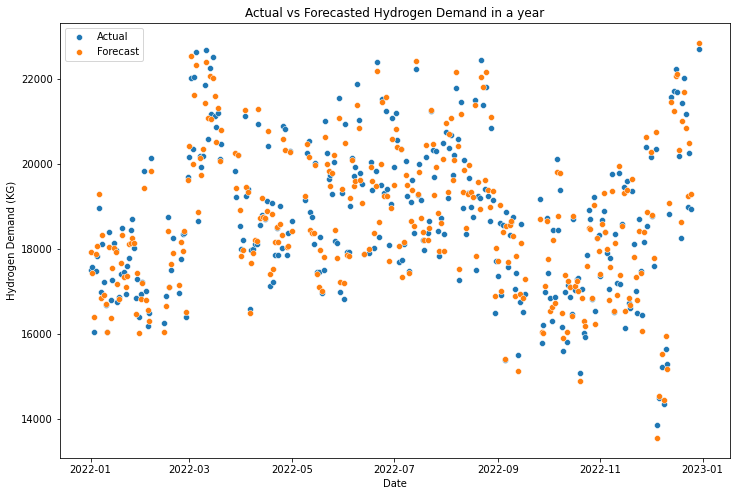

In [7]:
import numpy as np
import seaborn as sns

# load data from csv file
data = pd.read_csv('daily.csv')
df = pd.DataFrame(data)

# convert date column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# calculate median and interquartile range
Q1 = df['Hydrogen_Demand_Actual_KG'].quantile(0.25)
Q3 = df['Hydrogen_Demand_Actual_KG'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
outliers = df[(df['Hydrogen_Demand_Actual_KG'] < (Q1 - 1.5 * IQR)) | (df['Hydrogen_Demand_Actual_KG'] > (Q3 + 1.5 * IQR))]

# exclude outliers
df = df[~df.isin(outliers)].dropna()

# create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['Date'], y=df['Hydrogen_Demand_Actual_KG'], label='Actual')
sns.scatterplot(x=df['Date'], y=df['Hydrogen_Demand_Forecast_KG'], label='Forecast')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Hydrogen Demand (KG)')
plt.title('Actual vs Forecasted Hydrogen Demand in a year')
plt.show()


Now the outliers are removed and the scatter plot looks better now.

# Next we explore the wind speed hourly in a whole year

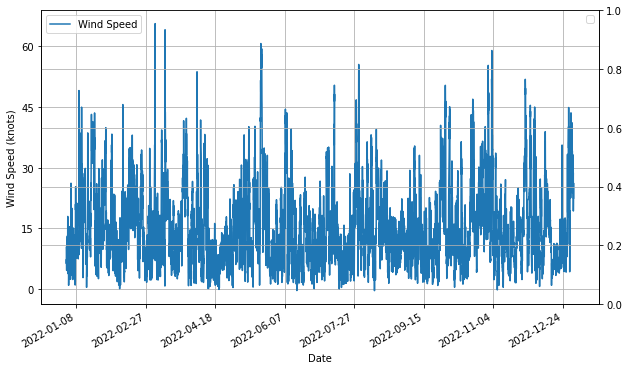

In [8]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('hourly.csv')

# Convert the column names to lowercase

# Check if the 'datehour' column exists
#if 'datehour' in df.columns:
#    print('The column exists')
#else:
#    print('The column does not exist')
#print(df.columns)
# set DateHour column as index and convert it to datetime format
df.set_index("DateHour", inplace=True)
df.index = pd.to_datetime(df.index)

# create a line chart of wind speed and actual production
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

df.plot(y=["Wind_Speed_Actual_Knots"], ax=ax1, color="tab:blue", linestyle='-')
#df.plot(y=["production_actual_mwh"], ax=ax2, color="tab:red", linestyle='--')

ax1.set_xlabel("Date")
ax1.set_ylabel("Wind Speed (knots)")
#ax2.set_ylabel("Actual Production (MWh)")
#ax1.set_title('Wind Speed and Actual Production')

ax1.legend(['Wind Speed'], loc=2)
ax2.legend(['Actual Production'], loc=1)

ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))

ax1.grid(True)
ax2.grid(True)

plt.show()
#fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
#df.plot(y=["wind_speed_actual_knots"], ax=ax1, color="tab:blue")
#df.plot(y=["production_actual_mwh"], ax=ax2, color="tab:red")

#ax1.set_ylabel("Wind Speed (knots)")
#ax2.set_ylabel("Actual Production (MWh)")
#plt.figure(figsize=(100, 50))
#plt.show()

In [9]:
# Load the data from hourly.csv
df = pd.read_csv('hourly.csv')

# Print the first 3 rows
print(df.head(3))


           DateHour  Wind_Speed_Actual_Knots  Production_Actual_MWh  \
0  01/01/2022 00:00                    10.34                35.3697   
1  01/01/2022 01:00                     9.52                27.5898   
2  01/01/2022 02:00                     6.31                 8.0303   

   Production_Forecast_1hour_MWh  Production_Forecast_6hour_MWh  \
0                        30.2627                        19.3683   
1                        24.9854                        19.2894   
2                        13.5787                        18.6246   

   Production_24hour_MWh  Electricity_Prices_Day_Ahead_Dollar  \
0                11.2438                               133.00   
1                 6.7481                               138.45   
2                10.6262                               107.54   

   Electricity_Prices_Spot_Dollar  Potential_Hydrogen_Quantity  \
0                          131.98                     1414.788   
1                          138.43                    

Calculate how much potential hydrogen could be generated from the electricity.

In [10]:
# load the hourly.csv file into a pandas dataframe
df = pd.read_csv('hourly.csv')

# create a new column 'potential hydrogen quantity' by multiplying Production_Actual_MWh column by 40(conversion rate)
df['Potential_Hydrogen_Quantity'] = df['Production_Actual_MWh'] * 40

# save the modified dataframe to a new CSV file
df.to_csv('hourly2.csv', index=False)
# print 'potential hydrogen quantity'
print(df["Potential_Hydrogen_Quantity"])

0        1414.788
1        1103.592
2         321.212
3         514.308
4         445.316
          ...    
8755     9225.948
8756    12554.012
8757    18799.540
8758    23068.024
8759    14577.828
Name: Potential_Hydrogen_Quantity, Length: 8760, dtype: float64


If all the generated hydrogen produced in the electrolyser run in reverse to generate clean electricity and sell to the grid, the revenue is added in the hourly.csv


In [11]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('hourly2.csv')

# Create a new column called 'profit if all selling'
df['Revenue_If_All_Selling'] = df['Potential_Hydrogen_Quantity'] * df['Electricity_Prices_Spot_Dollar']

# Save the modified dataframe to a new CSV file
df.to_csv('hourly2.csv', index=False)
print(df['Revenue_If_All_Selling'])

0       1.867237e+05
1       1.527702e+05
2       3.373368e+04
3       5.358061e+04
4       4.825444e+04
            ...     
8755    7.778397e+05
8756    1.013611e+06
8757    1.683875e+06
8758    1.796999e+06
8759    1.119286e+06
Name: Revenue_If_All_Selling, Length: 8760, dtype: float64


Calculate the profit and add the column 'profit if all selling' to the hourly.csv

In [12]:
# Load the CSV file into a pandas dataframe
df = pd.read_csv('hourly2.csv')

# Create the new column 'potential hydrogen quantity'
df['Potential_Hydrogen_Quantity'] = df['Production_Actual_MWh'] * 40

# Create the new column 'profit if all selling'
df['Profit_If_All_Selling'] = (df['Electricity_Prices_Day_Ahead_Dollar'] - df['Electricity_Prices_Spot_Dollar']) * df['Potential_Hydrogen_Quantity']

# Write the updated dataframe to the CSV file
df.to_csv('hourly2.csv', index=False)
print(df['Profit_If_All_Selling'])

0        1443.08376
1          22.07184
2         809.45424
3         699.45888
4        -298.36172
           ...     
8755    -2121.96804
8756   -14060.49344
8757     3947.90340
8758    16378.29704
8759     7143.13572
Name: Profit_If_All_Selling, Length: 8760, dtype: float64


# Simple strategy: Generate all wind powers to hydrogen powers until it reaches 86000kg, which is the Hydrogen Storage Capacity, and then sell all the rest electricity.

In [13]:
# Read in the CSV file
df = pd.read_csv('hourly2.csv')

# Extract the column of interest
phq = df['Potential_Hydrogen_Quantity']

# Create a new list to hold the sums
sums = []

# Iterate through the values, adding every 24th value
for i in range(23, len(phq), 24):
    s = phq.iloc[i-23:i+1].sum()
    sums.append(s)

# Print the list of sums
print(sums)

sums = df['Potential_Hydrogen_Quantity'].rolling(24).sum()[23::24]
# Find rows where the sum exceeds 86000 and print the corresponding row number and name of first column
for index, row in df.iloc[23::24].iterrows():
    if sums.loc[index] > 86000:
        print(f"{df.columns[0]}: {row[df.columns[0]]}, quantity: {sums.loc[index]}")



[30903.712000000003, 59677.436, 132760.684, 284343.37600000005, 276695.024, 119772.25600000001, 37183.907999999996, 52528.844000000005, 47708.94, 20161.2, 394877.532, 402499.604, 282596.76, 411330.72400000005, 31027.412, 225931.28800000003, 147525.97999999998, 289389.824, 1038065.456, 884736.248, 611139.2760000001, 136432.376, 52831.856, 147432.948, 99454.688, 284871.272, 86434.468, 606952.364, 549887.4199999999, 74232.38399999999, 34039.66, 41661.68000000001, 750181.192, 213487.672, 91018.456, 82710.77600000001, 16705.947999999997, 265210.076, 287600.172, 41740.82000000001, 33958.668, 122644.37599999999, 78206.232, 190580.20799999998, 201657.27999999997, 523956.14800000004, 679578.304, 877628.004, 374869.704, 311483.344, 368942.616, 137992.372, 35285.128, 434881.608, 598862.188, 98761.76400000001, 18643.744, 8306.184, 26745.272, 30549.14, 42201.092000000004, 8547.68, 37063.827999999994, 68052.16399999999, 19366.912, 8310.088, 25769.008, 111569.312, 850415.432, 949629.528, 852089.068, 

In that case, we would like to find out which row firstly exceed the capacity 86000kg.

In [14]:
# Load the data from hourly.csv
df = pd.read_csv('hourly2.csv')

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Loop through the intervals
while end_index <= len(df):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    
    # Check if the sum exceeds 86000
    if interval_sum > 86000:
        # Find the index of the first row that causes the sum to exceed 86000
        excess_index = (df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].cumsum() >= 86000).idxmax()
        
        # Print the row that causes the sum to exceed 86000
        print(df.loc[excess_index])
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size


DateHour                               03/01/2022 12:00
Wind_Speed_Actual_Knots                           14.64
Production_Actual_MWh                          100.4017
Production_Forecast_1hour_MWh                  118.9837
Production_Forecast_6hour_MWh                  126.8474
Production_24hour_MWh                          122.5329
Electricity_Prices_Day_Ahead_Dollar              159.27
Electricity_Prices_Spot_Dollar                   151.21
Potential_Hydrogen_Quantity                    4016.068
Revenue_If_All_Selling                     607269.64228
Profit_If_All_Selling                       32369.50808
Name: 60, dtype: object
DateHour                               04/01/2022 12:00
Wind_Speed_Actual_Knots                           17.63
Production_Actual_MWh                          175.3973
Production_Forecast_1hour_MWh                  189.7872
Production_Forecast_6hour_MWh                  186.6584
Production_24hour_MWh                          142.0198
Electricity_Prices_Day_A

In [16]:
# Load the data from hourly.csv
df = pd.read_csv('hourly2.csv')

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a dictionary to store the sum of 'Potential_Hydrogen_Quantity' and 'Profit_If_All_Selling' for each interval
interval_sum = {}

# Loop through the intervals
while end_index <= len(df):
    # Calculate the sum of "Potential_Hydrogen_Quantity" and "Profit_If_All_Selling" for the current interval
    interval_sum[end_index] = {'Potential_Hydrogen_Quantity': df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum(),
                               'Profit_If_All_Selling': df.loc[start_index:end_index-1, "Profit_If_All_Selling"].sum()}
    
    # Check if the sum of "Potential_Hydrogen_Quantity" exceeds 86000
    if interval_sum[end_index]['Potential_Hydrogen_Quantity'] > 86000:
        # Find the index of the first row that causes the sum to exceed 86000
        excess_index = (df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].cumsum() > 86000).idxmax()
        
        # Print the row that causes the sum to exceed 86000
        print(df.loc[excess_index])
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size
    
# Calculate the total sum of 'Potential_Hydrogen_Quantity' and 'Profit_If_All_Selling' for all intervals
total_sum = {'Potential_Hydrogen_Quantity': sum([interval_sum[k]['Potential_Hydrogen_Quantity'] for k in interval_sum.keys()]),
             'Profit_If_All_Selling': sum([interval_sum[k]['Profit_If_All_Selling'] for k in interval_sum.keys()])}

# Print the results
print('Sum of Potential_Hydrogen_Quantity: {}'.format(total_sum['Potential_Hydrogen_Quantity']))
print('Sum of Profit_If_All_Selling: {}'.format(total_sum['Profit_If_All_Selling']))


DateHour                               03/01/2022 12:00
Wind_Speed_Actual_Knots                           14.64
Production_Actual_MWh                          100.4017
Production_Forecast_1hour_MWh                  118.9837
Production_Forecast_6hour_MWh                  126.8474
Production_24hour_MWh                          122.5329
Electricity_Prices_Day_Ahead_Dollar              159.27
Electricity_Prices_Spot_Dollar                   151.21
Potential_Hydrogen_Quantity                    4016.068
Revenue_If_All_Selling                     607269.64228
Profit_If_All_Selling                       32369.50808
Name: 60, dtype: object
DateHour                               04/01/2022 12:00
Wind_Speed_Actual_Knots                           17.63
Production_Actual_MWh                          175.3973
Production_Forecast_1hour_MWh                  189.7872
Production_Forecast_6hour_MWh                  186.6584
Production_24hour_MWh                          142.0198
Electricity_Prices_Day_A

In [35]:
# Load the data from hourly.csv
df = pd.read_csv('hourly2.csv')

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a variable to store the total profit
total_profit = 0

# Loop through the intervals
while end_index <= len(df):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    
    # Check if the sum exceeds 86000
    if interval_sum > 86000:
        # Find the index of the first row that causes the sum to exceed 86000
        excess_index = (df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].cumsum() > 86000).idxmax()
        
        # Calculate the profit for this excess amount
        excess_sum = df.loc[start_index:excess_index, "Potential_Hydrogen_Quantity"].sum() - 86000
        excess_profit = excess_sum * df.loc[excess_index, "Electricity_Prices_Day_Ahead_Dollar"]
        
        # Add the profit to the total profit
        total_profit += excess_profit
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

print("Profit for the excess electricity sell: $", total_profit)


Profit for the excess electricity sell: $ 159543889.54472008


The profit is $171488968.96776012 + 159543889.54472008 = 3.31\times 10^{8}$ dollars.

# Try to visualize the relationship between hydrogen produced and the profit per hour on electricity

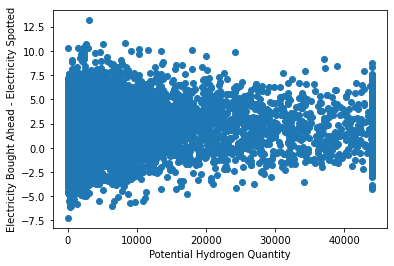

Fitted parameters: [0.55476841 3.67114766 2.08881891]


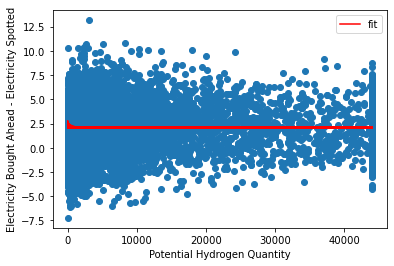

In [18]:
# read the csv file
hourly_df = pd.read_csv('hourly2.csv')

# Save the modified file


# create the new column by subtracting the 'Electricity_Prices_Spot_Dollar' column from the 'Electricity_Prices_Day_Ahead_Dollar' column
hourly_df['Electricity_bought_ahead - Electricity_spotted'] = hourly_df['Electricity_Prices_Day_Ahead_Dollar'] - hourly_df['Electricity_Prices_Spot_Dollar']


# save the updated dataframe to a new csv file
hourly_df.to_csv('hourly2.csv', index=False)


# Create the scatter plot
plt.scatter(hourly_df['Potential_Hydrogen_Quantity'], hourly_df['Electricity_bought_ahead - Electricity_spotted'])
plt.xlabel('Potential Hydrogen Quantity')
plt.ylabel('Electricity Bought Ahead - Electricity Spotted')
plt.show()

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Get the x and y data from the dataframe
xdata = hourly_df['Potential_Hydrogen_Quantity']
ydata = hourly_df['Electricity_bought_ahead - Electricity_spotted']

# Perform the curve fitting using the defined function
popt, pcov = curve_fit(func, xdata, ydata)

# Print the fitted parameters
print('Fitted parameters:', popt)

# Create a plot of the data and the fitted curve
plt.scatter(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit')
plt.xlabel('Potential Hydrogen Quantity')
plt.ylabel('Electricity Bought Ahead - Electricity Spotted')
plt.legend()
plt.show()


In [36]:
# Load the data from hourly.csv and skip the first row
df_hourly = pd.read_csv('hourly.csv', skiprows=[0])

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a list to store the sums for each interval
interval_sums = []

# Loop through the intervals
while end_index <= len(df):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    
    # Add the interval sum to the list of interval sums
    interval_sums.append(interval_sum)
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

# Load the data from daily.csv
df_daily = pd.read_csv('daily.csv')

# Check which interval sums are smaller than the values in the column 'Hydrogen_Demand_Actual_KG' in df_daily
smaller_than_demand = [interval_sums[i] < df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums))]

# Print the rows that are smaller than the values in the column 'Hydrogen_Demand_Actual_KG'
for i in range(len(smaller_than_demand)):
    if smaller_than_demand[i]:
        print(f"Interval {i+1} is smaller than Hydrogen_Demand_Actual_KG with sum {interval_sums[i]}")


Interval 37 is smaller than Hydrogen_Demand_Actual_KG with sum 16705.947999999997
Interval 58 is smaller than Hydrogen_Demand_Actual_KG with sum 8306.184
Interval 62 is smaller than Hydrogen_Demand_Actual_KG with sum 8547.68
Interval 66 is smaller than Hydrogen_Demand_Actual_KG with sum 8310.088
Interval 89 is smaller than Hydrogen_Demand_Actual_KG with sum 16504.216
Interval 90 is smaller than Hydrogen_Demand_Actual_KG with sum 13187.964
Interval 104 is smaller than Hydrogen_Demand_Actual_KG with sum 4574.684
Interval 105 is smaller than Hydrogen_Demand_Actual_KG with sum 15927.824
Interval 106 is smaller than Hydrogen_Demand_Actual_KG with sum 18137.392
Interval 108 is smaller than Hydrogen_Demand_Actual_KG with sum 11893.591999999999
Interval 109 is smaller than Hydrogen_Demand_Actual_KG with sum 1727.516
Interval 110 is smaller than Hydrogen_Demand_Actual_KG with sum 5237.736000000001
Interval 111 is smaller than Hydrogen_Demand_Actual_KG with sum 15088.9
Interval 120 is smaller th

In [41]:
# Load the data from hourly.csv and skip the first row
df_hourly = pd.read_csv('hourly.csv', skiprows=[0])

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a list to store the sums for each interval
interval_sums = []

# Loop through the intervals
while end_index <= len(df):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    
    # Add the interval sum to the list of interval sums
    interval_sums.append(interval_sum)
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

# Load the data from daily.csv
df_daily = pd.read_csv('daily.csv')

# Check which interval sums are smaller than the values in the column 'Hydrogen_Demand_Actual_KG' in df_daily
smaller_than_demand = [interval_sums[i] >= df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums))]

# Print the rows that are smaller than the values in the column 'Hydrogen_Demand_Actual_KG'
for i in range(len(smaller_than_demand)):
    if smaller_than_demand[i]:
        print(f"Interval {i+1} is greater than Hydrogen_Demand_Actual_KG with sum {interval_sums[i]}")


Interval 1 is greater than Hydrogen_Demand_Actual_KG with sum 30903.712000000003
Interval 2 is greater than Hydrogen_Demand_Actual_KG with sum 59677.436
Interval 3 is greater than Hydrogen_Demand_Actual_KG with sum 132760.684
Interval 4 is greater than Hydrogen_Demand_Actual_KG with sum 284343.37600000005
Interval 5 is greater than Hydrogen_Demand_Actual_KG with sum 276695.024
Interval 6 is greater than Hydrogen_Demand_Actual_KG with sum 119772.25600000001
Interval 7 is greater than Hydrogen_Demand_Actual_KG with sum 37183.907999999996
Interval 8 is greater than Hydrogen_Demand_Actual_KG with sum 52528.844000000005
Interval 9 is greater than Hydrogen_Demand_Actual_KG with sum 47708.94
Interval 10 is greater than Hydrogen_Demand_Actual_KG with sum 20161.2
Interval 11 is greater than Hydrogen_Demand_Actual_KG with sum 394877.532
Interval 12 is greater than Hydrogen_Demand_Actual_KG with sum 402499.604
Interval 13 is greater than Hydrogen_Demand_Actual_KG with sum 282596.76
Interval 14 is

In [43]:
# Load the data from hourly.csv and skip the first row
df_hourly = pd.read_csv('hourly.csv', skiprows=[0])

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a list to store the sums for each interval
interval_sums = []

# Loop through the intervals
while end_index <= len(df_hourly):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    
    # Add the interval sum to the list of interval sums
    interval_sums.append(interval_sum)
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

# Load the data from daily.csv
df_daily = pd.read_csv('daily.csv')

# Check which interval sums are smaller than the values in the column 'Hydrogen_Demand_Actual_KG' in df_daily
smaller_than_demand = [interval_sums[i] < df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums))]

# Calculate the excess supply for each interval
excess_supply = [interval_sums[i] - df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums)) if not smaller_than_demand[i]]

# Print the excess supply for each interval
for i in range(len(excess_supply)):
    print(f"Excess supply for interval {i+1}: {excess_supply[i]}")


Excess supply for interval 1: 13387.712000000003
Excess supply for interval 2: 42099.436
Excess supply for interval 3: 116716.68400000001
Excess supply for interval 4: 266872.37600000005
Excess supply for interval 5: 258860.02399999998
Excess supply for interval 6: 100811.25600000001
Excess supply for interval 7: 20195.907999999996
Excess supply for interval 8: 34403.844000000005
Excess supply for interval 9: 30495.940000000002
Excess supply for interval 10: 3469.2000000000007
Excess supply for interval 11: 378839.532
Excess supply for interval 12: 384108.604
Excess supply for interval 13: 265807.76
Excess supply for interval 14: 394050.72400000005
Excess supply for interval 15: 12892.412
Excess supply for interval 16: 207956.28800000003
Excess supply for interval 17: 130764.97999999998
Excess supply for interval 18: 272515.824
Excess supply for interval 19: 1020658.456
Excess supply for interval 20: 866236.248
Excess supply for interval 21: 593672.2760000001
Excess supply for interval

In [46]:
# Load the data from hourly.csv and skip the first row
df_hourly = pd.read_csv('hourly.csv', skiprows=[0])

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a list to store the sums for each interval
interval_sums = []

# Loop through the intervals
while end_index <= len(df_hourly):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    
    # Add the interval sum to the list of interval sums
    interval_sums.append(interval_sum)
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

# Load the data from daily.csv
df_daily = pd.read_csv('daily.csv')

# Check which interval sums are smaller than the values in the column 'Hydrogen_Demand_Actual_KG' in df_daily
smaller_than_demand = [interval_sums[i] < df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums))]

# Calculate the excess supply for each interval
excess_supply = [interval_sums[i] - df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums)) if not smaller_than_demand[i]]

# Initialize variables for tracking the rolling sum and the last row printed
rolling_sum = 0
last_row_printed = 0

# Loop through the excess supply values
for i in range(len(excess_supply)):
    # Add the current value to the rolling sum
    rolling_sum += excess_supply[i]
    
    # If the rolling sum exceeds 86000, print the current row and reset the rolling sum
    if rolling_sum >= 86000:
        print(f"Row {last_row_printed + i} exceeds 86000 with sum {rolling_sum}")
        rolling_sum = 0
        last_row_printed = i
        
# If there is a remaining rolling sum, print the last row
if rolling_sum > 0:
    print(f"Row {last_row_printed + len(excess_supply)} exceeds 86000 with sum {rolling_sum}")


Row 2 exceeds 86000 with sum 172203.832
Row 5 exceeds 86000 with sum 266872.37600000005
Row 7 exceeds 86000 with sum 258860.02399999998
Row 9 exceeds 86000 with sum 100811.25600000001
Row 14 exceeds 86000 with sum 88564.892
Row 19 exceeds 86000 with sum 378839.532
Row 21 exceeds 86000 with sum 384108.604
Row 23 exceeds 86000 with sum 265807.76
Row 25 exceeds 86000 with sum 394050.72400000005
Row 28 exceeds 86000 with sum 220848.70000000004
Row 31 exceeds 86000 with sum 130764.97999999998
Row 33 exceeds 86000 with sum 272515.824
Row 35 exceeds 86000 with sum 1020658.456
Row 37 exceeds 86000 with sum 866236.248
Row 39 exceeds 86000 with sum 593672.2760000001
Row 41 exceeds 86000 with sum 119481.37599999999
Row 44 exceeds 86000 with sum 164896.804
Row 48 exceeds 86000 with sum 347174.95999999996
Row 52 exceeds 86000 with sum 658522.8319999999
Row 55 exceeds 86000 with sum 532586.4199999999
Row 59 exceeds 86000 with sum 99376.724
Row 63 exceeds 86000 with sum 730345.192
Row 65 exceeds 8600

In [52]:
# Load the data from hourly.csv and skip the first row
df_hourly = pd.read_csv('hourly.csv')

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = 0
end_index = interval_size

# Initialize a list to store the sums for each interval
interval_sums = []

# Initialize a list to store the indices of excluded rows
excluded_rows = []

# Loop through the intervals
while end_index <= len(df_hourly):
    # Check if the current interval should be excluded
    if any(df.loc[start_index:end_index-1, 'DateHour'].isin(df.loc[excluded_rows, 'DateHour'])):
        # If so, add the row indices to the excluded_rows list
        excluded_rows += list(range(start_index, end_index))
    else:
        # If not, calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
        interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
        # Add the interval sum to the list of interval sums
        interval_sums.append(interval_sum)
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

# Load the data from daily.csv
df_daily = pd.read_csv('daily.csv')

# Check which interval sums are smaller than the values in the column 'Hydrogen_Demand_Actual_KG' in df_daily
smaller_than_demand = [interval_sums[i] < df_daily.loc[i, 'Hydrogen_Demand_Actual_KG'] for i in range(len(interval_sums))]

# Calculate the sum of "Profit_If_All_Selling" excluding the excluded rows
profit_sum = df.loc[~df_hourly.index.isin(excluded_rows), 'Profit_If_All_Selling'].sum()

# Initialize a variable to keep track of the running total
running_total = 0

# Loop through the interval sums and check if the running total exceeds 86000
for i, interval_sum in enumerate(interval_sums):
    # If the interval sum is smaller than the demand and the running total is less than 86000,
    # add the interval sum to the running total and check if it exceeds 86000
    if smaller_than_demand[i] and running_total + interval_sum < 86000:
        running_total += interval_sum
    # If the running total exceeds 86000, print the corresponding row and reset the running total
    elif running_total >= 86000:
        print(f"The first corresponding row where profit exceeds 86000 is: {df_daily.loc[i, 'DateHour']}")
        running_total = 0

# Print the final running total
print(f"The remaining profit after all intervals exceeding 86000 are excluded is: {profit_sum - running_total}")


The remaining profit after all intervals exceeding 86000 are excluded is: 171403002.51516


In [38]:

# Load the data from hourly.csv and daily.csv
hourly_df = pd.read_csv('hourly.csv',skiprows = [0])
daily_df = pd.read_csv('daily.csv')

# Set the size of each interval to 24 rows
interval_size = 24

# Initialize the starting and ending row indices for each interval
start_index = interval_size
end_index = start_index + interval_size

# Initialize a list to store the sum of "Potential_Hydrogen_Quantity" for each interval
interval_sums = []

# Loop through the intervals
while end_index <= len(df):
    # Calculate the sum of "Potential_Hydrogen_Quantity" for the current interval
    interval_sum = df.loc[start_index:end_index-1, "Potential_Hydrogen_Quantity"].sum()
    interval_sums.append(interval_sum)
    
    # Move on to the next interval
    start_index = end_index
    end_index += interval_size

# Check which of the interval sums are greater than or equal to the corresponding "Hydrogen_Demand_Actual_KG"
excess_supply = []
for i, interval_sum in enumerate(interval_sums):
    if interval_sum >= daily_df.loc[i, "Hydrogen_Demand_Actual_KG"]:
        excess = interval_sum - daily_df.loc[i, "Hydrogen_Demand_Actual_KG"]
        excess_supply.append(excess)
    else:
        print("Group", i+1, "has insufficient supply.")

# Print the excess supply
print("Excess supply:", excess_supply)


Group 57 has insufficient supply.
Group 61 has insufficient supply.
Group 64 has insufficient supply.
Group 65 has insufficient supply.
Group 88 has insufficient supply.
Group 89 has insufficient supply.
Group 103 has insufficient supply.
Group 104 has insufficient supply.
Group 105 has insufficient supply.
Group 107 has insufficient supply.
Group 108 has insufficient supply.
Group 109 has insufficient supply.
Group 110 has insufficient supply.
Group 119 has insufficient supply.
Group 120 has insufficient supply.
Group 146 has insufficient supply.
Group 147 has insufficient supply.
Group 148 has insufficient supply.
Group 149 has insufficient supply.
Group 158 has insufficient supply.
Group 163 has insufficient supply.
Group 169 has insufficient supply.
Group 170 has insufficient supply.
Group 176 has insufficient supply.
Group 180 has insufficient supply.
Group 182 has insufficient supply.
Group 190 has insufficient supply.
Group 191 has insufficient supply.
Group 197 has insufficient

In [40]:
# Loop through the excess_supply list
for i, excess in enumerate(excess_supply):
    # Check if excess supply is greater than or equal to zero
    if excess >= 0:
        # Calculate the start and end row indices for the current group
        start_index = i * interval_size + 1
        end_index = start_index + interval_size - 1
        
        # Print the rows for the current group
        print(f"Group {i+1} - Excess supply: {excess:.2f}")
        print(hourly_df.loc[start_index:end_index, :])
        print()


Group 1 - Excess supply: 42161.44
    01/01/2022 00:00  10.34  35.3697  30.2627  19.3683  11.2438     133  \
1   01/01/2022 02:00   6.31   8.0303  13.5787  18.6246  10.6262  107.54   
2   01/01/2022 03:00   7.38  12.8577  13.8099  17.0159  10.6262  105.54   
3   01/01/2022 04:00   7.03  11.1329  10.5426  13.9052  12.3877  107.69   
4   01/01/2022 05:00   5.74   6.0457   7.7282   8.6532  14.9853   98.36   
5   01/01/2022 06:00   4.64   3.1974   4.5571   5.1233  19.0160  108.73   
6   01/01/2022 07:00   7.25  12.1890   6.4915   8.4198  36.8433   74.94   
7   01/01/2022 08:00   9.51  27.5379  11.6169  10.2155  43.2345   75.86   
8   01/01/2022 09:00   7.33  12.6148  14.5050  10.4862  13.6434  105.67   
9   01/01/2022 10:00   8.87  22.3517  20.1574  13.6148  15.3487  131.45   
10  01/01/2022 11:00  11.53  49.0798  25.2919  22.5560  12.4007  115.45   
11  01/01/2022 12:00  12.05  55.9748  40.5123  30.6710  12.7358  127.58   
12  01/01/2022 13:00  11.91  54.0099  52.9678  35.3608  17.0219  1

      01/01/2022 00:00  10.34    35.3697   30.2627   19.3683   11.2438  \
1057  14/02/2022 02:00  18.50   202.6954  212.5128  207.7392  202.2740   
1058  14/02/2022 03:00  16.23   136.6972  154.0185  165.9824  165.7910   
1059  14/02/2022 04:00  25.75   546.3759  262.1728  250.2652  198.7450   
1060  14/02/2022 05:00  24.58   475.2960  349.4387  279.3973  202.2740   
1061  14/02/2022 06:00  18.23   193.8425  277.3554  235.2180  198.0283   
1062  14/02/2022 07:00  18.42   199.9973  234.1911  238.3976  200.4602   
1063  14/02/2022 08:00  15.08   109.6423  135.0094  178.7578  150.7066   
1064  14/02/2022 09:00  11.85    53.2556   78.4347  102.5005  109.9028   
1065  14/02/2022 10:00  15.12   110.6703   88.1145  117.5822  146.1978   
1066  14/02/2022 11:00  14.82   104.0472   86.4843  106.6175  131.5905   
1067  14/02/2022 12:00  16.89   154.1672  121.6936  102.7017  145.2572   
1068  14/02/2022 13:00  21.91   336.2271  182.5753  133.9426  173.2484   
1069  14/02/2022 14:00  23.17   397.67

      01/01/2022 00:00  10.34   35.3697  30.2627  19.3683  11.2438     133  \
2113  30/03/2022 02:00   5.34    4.8787   4.1793   1.6967   1.9517   84.24   
2114  30/03/2022 03:00   5.77    6.1419   6.7854   3.4042   1.9517   80.69   
2115  30/03/2022 04:00   5.24    4.5926   4.8787   4.6049   1.9517   75.71   
2116  30/03/2022 05:00   5.93    6.6744   5.7557   6.6661   2.8967   77.06   
2117  30/03/2022 06:00   3.08    0.9368   1.9212   2.1683   1.5185   80.08   
2118  30/03/2022 07:00   3.83    1.7968   2.1335   2.5428   2.3386   74.95   
2119  30/03/2022 08:00   2.77    0.6835   0.8653   1.3399   1.5605  102.61   
2120  30/03/2022 09:00   5.66    5.8122   2.1878   2.4667   4.7342  112.66   
2121  30/03/2022 10:00   4.54    2.9951   2.5907   2.0142   3.7985   94.97   
2122  30/03/2022 11:00   4.02    2.0722   2.6847   2.1896   2.8234   76.54   
2123  30/03/2022 12:00  13.49   78.5478  12.6982   7.2514   3.7371   75.94   
2124  30/03/2022 13:00  11.78   52.3030  29.7649  15.7631   3.73

      01/01/2022 00:00  10.34    35.3697    30.2627    19.3683    11.2438  \
3169  13/05/2022 02:00  10.74    39.6754    15.4766    13.9886    10.0184   
3170  13/05/2022 03:00   7.24    12.1511    14.8623    13.3182    10.2677   
3171  13/05/2022 04:00   5.68     5.8521     9.9799     8.7260     7.7917   
3172  13/05/2022 05:00   5.54     5.4394     6.3930     8.2534     7.5386   
3173  13/05/2022 06:00   8.10    16.9750     8.5345    13.2798    10.9719   
3174  13/05/2022 07:00   6.80    10.0797    10.0994     9.5009     9.9753   
3175  13/05/2022 08:00   7.38    12.8820    12.9971     9.6231    11.0832   
3176  13/05/2022 09:00   8.81    21.8832    14.4164    12.5847    11.0832   
3177  13/05/2022 10:00   8.44    19.2559    17.7224    15.8199    12.5130   
3178  13/05/2022 11:00   9.05    23.6985    21.5605    16.9909    14.8345   
3179  13/05/2022 12:00    NaN  1100.0000  1100.0000  1100.0000  1100.0000   
3180  13/05/2022 13:00    NaN  1100.0000  1100.0000  1100.0000  1100.0000   

      01/01/2022 00:00  10.34   35.3697   30.2627   19.3683   11.2438     133  \
4345  01/07/2022 02:00   2.32    0.4020    0.5991    1.3802    3.9372   41.32   
4346  01/07/2022 03:00   3.10    0.9541    0.7577    1.1560    3.6153   30.70   
4347  01/07/2022 04:00   3.50    1.3705    0.8424    0.9640    2.0442   36.50   
4348  01/07/2022 05:00   4.43    2.7756    1.5888    1.1583    1.9912   86.83   
4349  01/07/2022 06:00   6.11    7.2855    3.2742    1.8857    1.9912   85.06   
4350  01/07/2022 07:00   3.24    1.0877    1.9202    1.5648    1.2090   91.50   
4351  01/07/2022 08:00   5.47    5.2465    3.8567    3.0119    1.3389   87.88   
4352  01/07/2022 09:00   1.03    0.0354    0.3142    0.5274    0.3351   78.53   
4353  01/07/2022 10:00   2.32    0.4009    0.5841    0.8458    0.6789   75.50   
4354  01/07/2022 11:00   1.87    0.2101    0.1694    0.4050    0.5129   78.97   
4355  01/07/2022 12:00   9.23   25.1738    2.8686    2.0276    1.2237   76.52   
4356  01/07/2022 13:00   9.6

5472   43.39   4171.524  1.810024e+05   6841.29936  

Group 229 - Excess supply: 142996.15
      01/01/2022 00:00  10.34   35.3697   30.2627   19.3683   11.2438     133  \
5473  17/08/2022 02:00  15.80  126.0599  117.1457  139.9616  148.0876   27.71   
5474  17/08/2022 03:00  14.39   95.3131  101.5506  110.0617  130.1330   35.07   
5475  17/08/2022 04:00  12.13   57.1342   72.2345   75.9881   91.3487   40.70   
5476  17/08/2022 05:00  10.69   39.0481   49.2281   57.0495   73.5233   38.11   
5477  17/08/2022 06:00  12.68   65.2038   53.0027   68.7984   86.8613   19.62   
5478  17/08/2022 07:00  11.46   48.1133   49.0676   53.4103   70.8181   73.00   
5479  17/08/2022 08:00  16.91  154.5888   81.9153   66.6575   99.7333   87.81   
5480  17/08/2022 09:00  19.00  219.3819  125.8816   90.5516   99.7333   74.87   
5481  17/08/2022 10:00  19.60  240.9954  202.6457  129.2955   99.7333   66.38   
5482  17/08/2022 11:00  17.98  186.0494  200.0184  156.8873  109.9711   59.26   
5483  17/08/2022 1

      01/01/2022 00:00  10.34   35.3697   30.2627   19.3683   11.2438     133  \
6385  24/09/2022 02:00   8.67   20.8713   11.2206   13.0448   29.9940   41.52   
6386  24/09/2022 03:00   8.15   17.2986   15.0312   11.3949   20.9720   42.98   
6387  24/09/2022 04:00   7.76   14.9514   16.2382   13.0311   16.9084   71.66   
6388  24/09/2022 05:00   6.88   10.4211   12.1323   12.1240   13.0539   80.57   
6389  24/09/2022 06:00   7.70   14.5846   13.2059   14.9720   14.6758   78.74   
6390  24/09/2022 07:00   9.53   27.6866   16.5990   16.3968   14.7672   89.76   
6391  24/09/2022 08:00  12.08   56.3265   29.8077   21.7155   14.7672   88.74   
6392  24/09/2022 09:00   8.71   21.1043   26.6078   22.1097   16.0965   86.28   
6393  24/09/2022 10:00   6.21    7.6684   14.0693   13.6469   11.3669   81.33   
6394  24/09/2022 11:00   8.23   17.8086   14.6874   20.2627   17.5524   78.23   
6395  24/09/2022 12:00  12.62   64.3529   23.4816   28.0252   17.5524   76.29   
6396  24/09/2022 13:00  20.4

7536   68.95    88.636    6111.45220    40.77256  



To build a model that recommends when to use the electrolyser to generate hydrogen or electricity, we will need to use machine learning techniques to analyze the provided data and generate predictions based on it.
we will use a supervised learning approach to train a model using the historical data and then use that model to predict the optimal operation strategy for future data. Here are the steps we can follow to build the model:
Data preprocessing: We will need to first preprocess the provided data to ensure that it is in a format that can be used for machine learning. This will involve cleaning the data, handling missing values, and transforming the data into numerical format. We can use pandas library in Python to read and preprocess the data.

Feature engineering: We will need to identify relevant features that can be used to predict the optimal operation strategy. This may include variables like wind_speed, Production_Actual_MWh, Production_Forecast_1hour_MWh, Electricity_Prices_Day_Ahead_Dollar and Electricity_Prices_Spot_Dollar. We can use feature selection techniques to identify the most relevant features.

Model training: Once we have preprocessed the data and identified relevant features, we can train a supervised learning model using the historical data. We can use different regression models such as linear regression, decision tree, random forest, or gradient boosting regression depending on the complexity and accuracy requirements of the model. We can use scikit-learn library in Python for building the model.

Model evaluation: We will evaluate the performance of the trained model using the additional month of data provided. We will calculate the prediction accuracy, confusion matrix, and F1 score to evaluate the model's performance.
Model deployment: Once the model has been trained and evaluated, we can deploy it to make predictions in real-time. We can create a Python program that takes input from the parameters like wind_speed, Production_Actual_MWh, Production_Forecast_1hour_MWh, Electricity_Prices_Day_Ahead_Dollar and Electricity_Prices_Spot_Dollar for each hour in a day and outputs the optimal operation strategy to maximize profit and ensure there is enough hydrogen available to meet demand at the plant.

We can use time series forecasting models such as ARIMA, Prophet or LSTM to forecast the hourly production of electricity and hydrogen demand for the next day based on the historical data. These models can take into account parameters like wind_speed, Production_Actual_MWh, Production_Forecast_1hour_MWh, Electricity_Prices_Day_Ahead_Dollar, and Electricity_Prices_Spot_Dollar to improve the accuracy of the forecast.
Next, we can use an optimization algorithm such as linear programming to determine the optimal balance between using the electrolyser to generate hydrogen versus using it to generate electricity for the grid, based on the forecasted values. The objective function of the optimization algorithm can be to maximize the profit made from selling excess electricity to the grid, less the costs of buying additional electricity from the grid.
We can set constraints in the optimization algorithm to ensure that there is always enough hydrogen available to meet demand at the plant. We can also set constraints on the maximum and minimum amounts of hydrogen and electricity that can be produced in a given hour.